In [1]:
import pandas as pd
df_t=pd.read_csv("C:/Users/mohamedi/Documents/titanic-passengers.csv",sep=";")
df_t['Age'].fillna(df_t['Age'].mean(),inplace=True)
df_t.isnull().sum()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [2]:
Number=len(df_t["Cabin"])
print("Number of elements:",Number)
print(df_t["Cabin"].value_counts())
df_t["Cabin"].fillna('G6',inplace=True)
df_t.isnull().sum()

Number of elements: 891
B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F33            3
              ..
E68            1
B86            1
A5             1
C82            1
C91            1
Name: Cabin, Length: 147, dtype: int64


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [3]:
Number_2=len(df_t["Embarked"])
print("Number of elements:",Number_2)
print(df_t["Embarked"].value_counts())
df_t["Embarked"].fillna('S',inplace=True)
df_t.isnull().sum()

Number of elements: 891
S    644
C    168
Q     77
Name: Embarked, dtype: int64


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [4]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


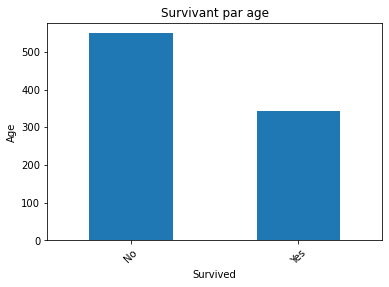

In [5]:
import matplotlib.pyplot as plt
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Survivant par age")
bar_1= df_t['Survived'].value_counts()
bar_1.plot.bar(rot=45)

C:\Users\mohamedi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


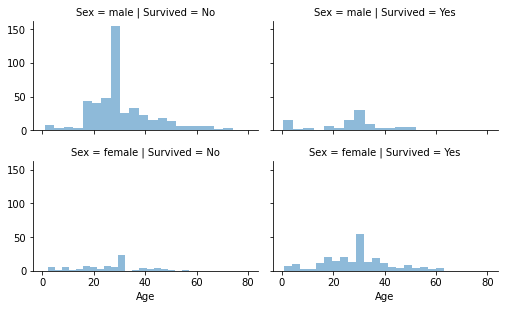

In [6]:
import seaborn as sns
grid = sns.FacetGrid(df_t,col='Survived', 
    row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha=.5, bins=20)
grid.add_legend()

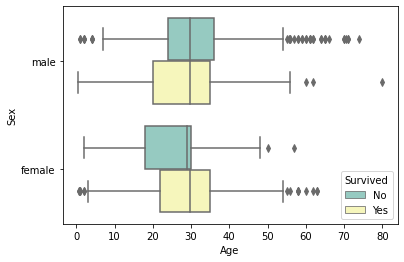

In [7]:
import seaborn as sns
sns.boxplot(hue="Survived",x="Age",y="Sex",data=df_t,palette="Set3")

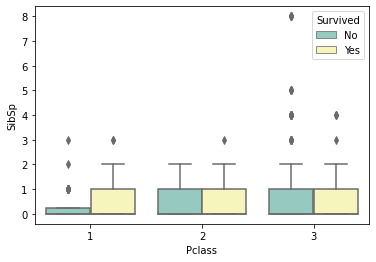

In [8]:
sns.boxplot(hue="Survived",x="Pclass",y="SibSp",data=df_t,palette="Set3")

In [9]:
def plot_correlation_map( df_t ):

    corr = df_t.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

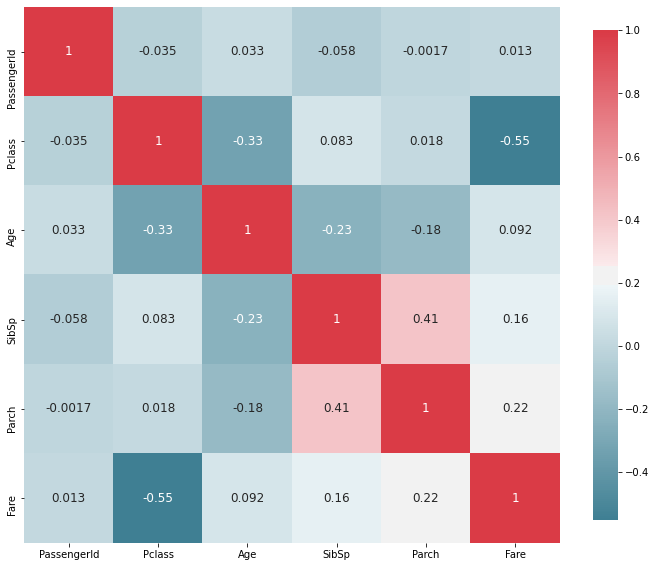

In [10]:
plot_correlation_map( df_t )

this matrix represent the correlation between the different features

In [20]:
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [26]:
df_t[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [25]:
df_t[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
title=[]
df1=' '
for i in df_t['Name']:
    df1=i.split(',')
    df1=df1[1].split('.')
    df2=df1[0].strip()
    print(df2)
    title.append(str(df2))
df_t['title']=title 
df_t.head()

Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Miss
Mr
Mrs
Mr
Miss
Mrs
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Mr
Mr
Dr
Mr
Miss
Mr
Mr
Mr
Major
Mrs
Don
Mr
Mr
Mr
Miss
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Master
Dr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mrs
Miss
Miss
Master
Miss
Mr
Rev
Mr
Mrs
Mrs
Miss
Mr
Mrs
Mr
Mr
Miss
Mr
Miss
Miss
Miss
Mrs
Master
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mrs
Mrs
Miss
Mrs
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Mr
Master
Mr
Mr
Mr
Mr
Mrs
Miss
Mr
Mr
Master
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Col
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mrs
Miss
Mr
Miss
Mrs
Miss
Mr
Mr
Mr
Mrs
Mr
Miss
Mrs
Mr
Miss
Mr
Mrs
Miss
Mr
Mr
Mr
Miss
Master
Mr
Mr
Mr
Mrs
Mrs
Miss
Master
Miss
Mr
Miss
Mrs
Mr
Mr
Dr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Master
Mr
Mrs
Miss
Mrs
Miss
Miss
Mr
Miss
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Miss
Miss
Mr
Mrs
Miss
Mr
Mr
Mr
Mr
Master
Mr
Mr
Mr
Mrs
Mrs
Miss
Mr
Mrs
Mr
Mr
Miss
Mr
Miss
Miss
Mrs
Mr
Master
Mlle
Mr
Mr
Mr
Mr
Mrs
Mrs
Mr
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mr
Master
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Dr
Mr
Mrs
Mis

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


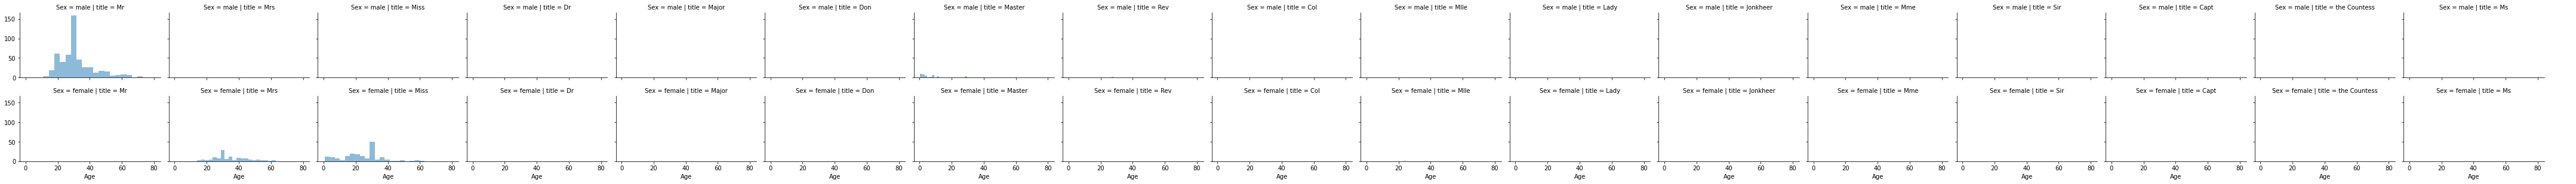

In [29]:
grid = sns.FacetGrid(df_t,col='title', 
    row='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha=.5, bins=20)
grid.add_legend()

In [30]:
df_t['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Capt              1
Mme               1
Jonkheer          1
Don               1
Sir               1
Lady              1
the Countess      1
Ms                1
Name: title, dtype: int64

Text(0, 0.5, 'Survival Probability')

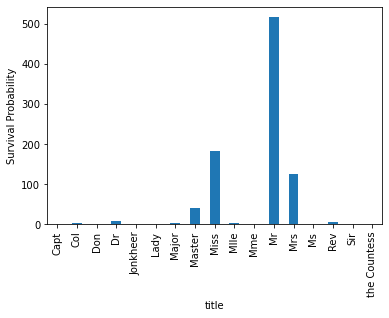

In [33]:
plt = df_t.title.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('title')
plt.set_ylabel('Survival Probability')

In [34]:
Title_Dictionary = {"Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :       "Royalty",

                  "Countess":     "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}


0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: title, Length: 891, dtype: object

In [35]:
df_t['title']=df_t['title'].map(Title_Dictionary)

In [36]:
df_t['title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      4
Name: title, dtype: int64

Text(0, 0.5, 'Survival Probability')

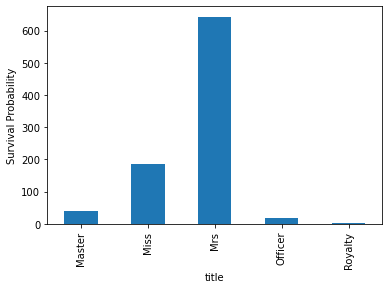

In [38]:
plt = df_t.title.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('title')
plt.set_ylabel('Survival Probability')

In [39]:
family=pd.DataFrame()
family['family']=df_t['Parch']+df_t['SibSp']
family.head()

,family
0,0
1,0
2,0
3,4
4,1


In [45]:
df_t['family']=family

In [46]:
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1


Text(0, 0.5, 'Survival Probability')

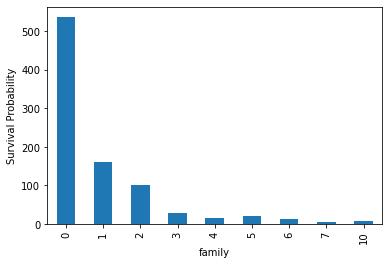

In [47]:
plt = df_t.family.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('family')
plt.set_ylabel('Survival Probability')

the higher your family are the lower you have survival probability